In [1]:
#encoding=utf-8
import jieba

seg_list = jieba.cut("我来到北京清华大学",cut_all=True)
print(seg_list)
for w in seg_list:
    print(w)
    
print ("Full Mode:", " ".join(seg_list)) #全模式


jieba.add_word('喜欢') # 动态添加新词
seg_list = jieba.lcut("中区食堂和北区食堂是我最喜欢的",cut_all=False)
print(seg_list)

seg_list = jieba.cut("我来到北京清华大学",cut_all=False)
print ("Default Mode:", "/ ".join(seg_list)) #精确模式

seg_list = jieba.cut("他来到了网易杭研大厦") #默认是精确模式
print (", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造") #搜索引擎模式
print (",".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/xn/rppkx2t57cn1q1sh2rm9g70h0000gn/T/jieba.cache


<generator object Tokenizer.cut at 0x7fe145978c10>


Loading model cost 0.481 seconds.
Prefix dict has been built successfully.


我
来到
北京
清华
清华大学
华大
大学
Full Mode: 
['中', '区', '食堂', '和', '北区', '食堂', '是', '我', '最', '喜欢', '的']
Default Mode: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明,硕士,毕业,于,中国,科学,学院,科学院,中国科学院,计算,计算所,，,后,在,日本,京都,大学,日本京都大学,深造


In [2]:
words =jieba.cut("我爱北京天安门")
for word in words:
    print (word)

我
爱
北京
天安门


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from wordcloud import WordCloud,STOPWORDS
import jieba
import matplotlib.pyplot as plt

- 从CSV文件中导入数据

In [4]:
data = pd.read_csv('./dianping.csv')
data.head()

,comment,star
0,口味：不知道是我口高了，还是这家真不怎么样。??我感觉口味确实很一般很一般。上菜相当快，我敢...,2
1,菜品丰富质量好，服务也不错！很喜欢！,4
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,2
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,5
4,先说我算是娜娜家风荷园开业就一直在这里吃??每次出去回来总想吃一回??有时觉得外面的西式简餐...,4


* 数据预处理：通过star属性，准备sentiment属性

In [5]:
def make_label(star):
    if star > 3:
        return 1
    else:
        return 0
    
data['sentiment'] = data.star.apply(make_label)

data = data[['comment' , 'sentiment']]
data.head()

,comment,sentiment
0,口味：不知道是我口高了，还是这家真不怎么样。??我感觉口味确实很一般很一般。上菜相当快，我敢...,0
1,菜品丰富质量好，服务也不错！很喜欢！,1
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,0
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,1
4,先说我算是娜娜家风荷园开业就一直在这里吃??每次出去回来总想吃一回??有时觉得外面的西式简餐...,1


* 简单版分词

In [6]:
def simple_word_cut (texts):
    return '/'.join(jieba.cut(texts, cut_all=False))

data['simple_cut_comment'] = data.comment.apply(simple_word_cut)
data.head()

,comment,sentiment,simple_cut_comment
0,口味：不知道是我口高了，还是这家真不怎么样。??我感觉口味确实很一般很一般。上菜相当快，我敢...,0,口味/：/不/知道/是/我口/高/了/，/还是/这家/真/不怎么样/。/?/?/我/感觉/口...
1,菜品丰富质量好，服务也不错！很喜欢！,1,菜品/丰富/质量/好/，/服务/也/不错/！/很/喜欢/！
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,0,说真的/，/不/晓得/有人/排队/的/理由/，/香精/香精/香精/香精/，/拜拜/！
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,1,菜量/实惠/，/上菜/还/算/比较/快/，/疙瘩汤/喝出/了/秋日/的/暖意/，/烧茄子/吃...
4,先说我算是娜娜家风荷园开业就一直在这里吃??每次出去回来总想吃一回??有时觉得外面的西式简餐...,1,先说/我/算是/娜娜/家风/荷园/开业/就/一直/在/这里/吃/?/?/每次/出去/回来/总...


In [7]:
jieba.add_word('口高')
def word_cut (texts):
    words_list = []
    word_generator = jieba.cut(texts, cut_all=False)  # 返回的是一个迭代器
    with open('hit_stopwords.txt') as f:
        str_text = f.read()
    for word in word_generator:
        if word.strip() not in str_text:
            words_list.append(word)
            #print ('1')
    return ' '.join(words_list)  # 注意是空格

data['cut_comment'] = data.comment.apply(word_cut)

data.head()

,comment,sentiment,simple_cut_comment,cut_comment
0,口味：不知道是我口高了，还是这家真不怎么样。??我感觉口味确实很一般很一般。上菜相当快，我敢...,0,口味/：/不/知道/是/我口/高/了/，/还是/这家/真/不怎么样/。/?/?/我/感觉/口...,口味 知道 口高 这家 不怎么样 感觉 口味 确实 很 很 上菜 相当 快 我敢 菜 都 提...
1,菜品丰富质量好，服务也不错！很喜欢！,1,菜品/丰富/质量/好/，/服务/也/不错/！/很/喜欢/！,菜品 丰富 质量 服务 不错 很 喜欢
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,0,说真的/，/不/晓得/有人/排队/的/理由/，/香精/香精/香精/香精/，/拜拜/！,说真的 晓得 有人 排队 理由 香精 香精 香精 香精 拜拜
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,1,菜量/实惠/，/上菜/还/算/比较/快/，/疙瘩汤/喝出/了/秋日/的/暖意/，/烧茄子/吃...,菜量 实惠 上菜 算 比较 快 喝出 秋日 暖意 烧茄子 吃 出 大阪 烧 味道 想 吃 土...
4,先说我算是娜娜家风荷园开业就一直在这里吃??每次出去回来总想吃一回??有时觉得外面的西式简餐...,1,先说/我/算是/娜娜/家风/荷园/开业/就/一直/在/这里/吃/?/?/每次/出去/回来/总...,先说 算是 娜娜 家风 荷园 开业 吃 每次 出去 回来 总想 吃 一回 有时 觉得 外面 ...


Positive words


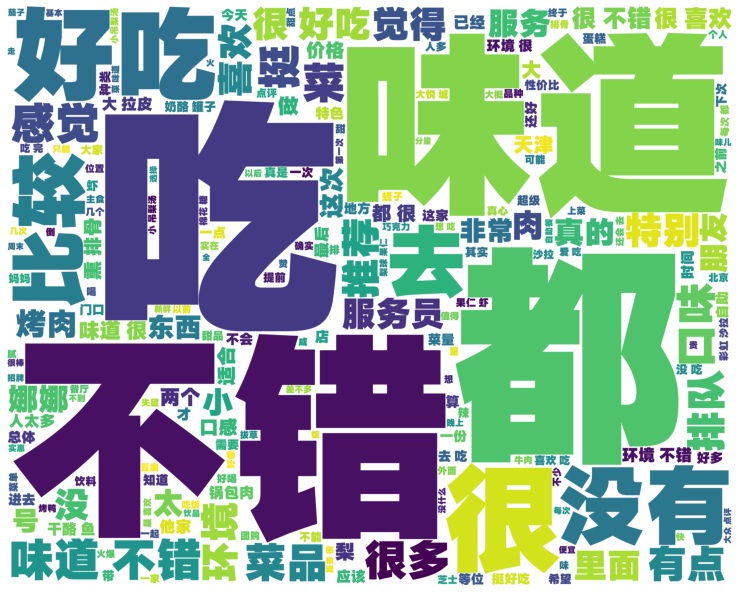

In [8]:
def draw_wordcloud (text, color = 'white'):
    wc = WordCloud(stopwords = STOPWORDS,
                      font_path="HYQiHei-105.ttf",
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(text)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

print("Positive words")

data_pos = data[ data['sentiment'] == 1 ]
words_pos = ' '.join(data_pos['cut_comment'])
draw_wordcloud (words_pos)


Negtive words


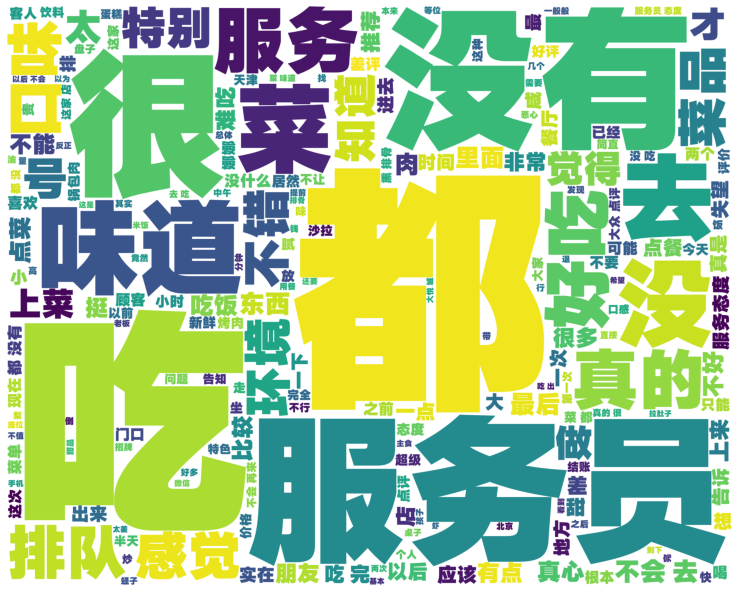

In [9]:
print("Negtive words")

data_neg = data [data['sentiment'] == 0]
words_neg = ' '.join(data_neg['cut_comment'])
draw_wordcloud (words_neg)